# This notebook is dedicated to the visualization of the Yield Curve.

## What is the yield curve?

The yield curve shows the different yields, or interest rates, across different contract lengths at a snapshot in time (typically daily). The curves below are all based on data obtained from [FRED](https://research.stlouisfed.org/) - Federal Reserve Economic Data.

## Why is the yield curve important?

The yield curve is a popular indicator among economists (as listeners of Planet Money's The Indicator will know) because it has correctly forecasted a recession in the United States without any false positives, since about 1970. This predictive power is triggered when the yield curve becomes "inverted" - meaning that short term interest rates outweigh long term interest rates.

*NOTE*: This is slightly vague, but what is specifically meant here is the difference in ten year yield, when compared to three month yield.

## Longer explanation of the yield curve

The current view of the yield curve is a relatively recent phenomenon, all things considered. It is only since after the Great Depression would we consider the positively sloping yield curves 'normal.' Prior to this, for most of the 19th and 20th centuries, the United States would have had a negatively sloping yield curve. This is caused because the growth the U.S. experienced was **deflationary**, as opposed to the inflationary growth the Fed targets currently. This is because in deflationary growth, current cash flows are less valuable than future cash flows.

For a more detailed explanation, see the [Wikipedia page](https://en.wikipedia.org/wiki/Yield_curve).

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [2]:
def read_in_data(filename, index_col="DATE"):
    dataframe = pd.read_csv(filename, index_col=index_col)
    dataframe.drop("T10Y3M", axis=1, inplace=True)
    return dataframe

In [3]:
def get_data_for_date(date_, df):
    try:
        datum = df.loc[date_]
    except KeyError:
        print("Sorry, no data is available for that day.")
        return None, None
    x_arr = np.array([1.0/12, 3.0/12, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 20.0, 30.0])
    y_arr = np.array(list(filter(lambda x: x is not None, [None if x == "." else float(x) for x in datum])))
    mask = [idx for idx, x in enumerate(y_arr) if x < np.inf]
    if not mask:
        print("Sorry, no data is available for that day.")
        return None, None 
    x = x_arr[mask]
    y = y_arr[mask]
    if len(x) != len(x_arr):
        print("WARNING: some data is missing for this date.")
    if y_arr[-1] != y[-1]:
        print("WARNING: 30 year rate is not available for this date.")
    return x, y

In [4]:
def plot_yield_curve(date_, dataframe):
    x, y = get_data_for_date(date_, dataframe)
    if x is None and y is None:
        return
    cs = CubicSpline(x, y)
    xx = np.linspace(0, 30, num=200)
    plt.plot(x, y, 'k.')
    plt.plot(xx, cs(xx), 'b--')
    plt.title(f"Yield Curve for {date_}")
    plt.xlabel("Borrowing Period (years)")
    plt.ylabel("Interest Rates (percent)")
    plt.show()

In [5]:
def plot_long_term_difference_measure(filename, index_col="DATE"):
    df = pd.read_csv(filename, index_col=index_col)
    series = df["T10Y3M"].copy()
    y_arr = np.array(list(filter(lambda x: x is not None, [None if x == "." else float(x) for x in series.tolist()])))
    mask = [idx for idx, x in enumerate(y_arr) if x < np.inf]
    y_arr = y_arr[mask]
    dates = np.array(series.index.tolist())
    dates_used = dates[mask]
    x_arr = np.arange(len(dates))[mask]
    plt.plot(x_arr, y_arr, 'k--')
    plt.plot(x_arr, [0]*len(x_arr), 'r')
    plt.xticks(x_arr[::365], dates_used[::365], rotation=90)
    plt.tight_layout()
    plt.show()
    return

In [6]:
dataframe = read_in_data("data/yield_curve_data_ordered.csv")

#### Normal Yield Curve

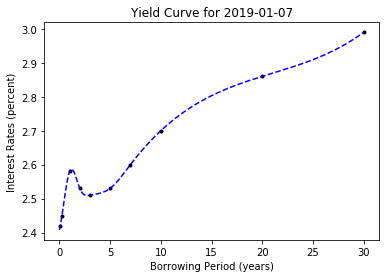

In [7]:
plot_yield_curve("2019-01-07", dataframe)

#### Inverted Yield Curve

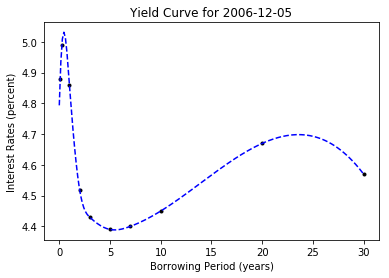

In [8]:
plot_yield_curve("2006-12-05", dataframe)

#### Trend Over Time
As indicated in the notes above, the main consideration we're looking at is 10 year vs 3 month yield. So instead of a snapshot, we can plot this over time. The red line is added to visualize periods of time in which the yield curve is inverted.

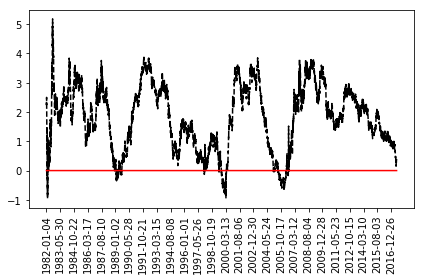

In [9]:
plot_long_term_difference_measure("data/yield_curve_data_ordered.csv")